# Nipy quickstart

In this notebook, we will have a look at the [Nipy](https://nipy.org) ecosystem. 

## Visualization with Nilearn

Nilearn is a python module used for statisical learning on neuroimaging data. In addition to various statistical and machine-learning tools, it also allows for easy visualizing MRI data. Let's have a look!

In [8]:
%matplotlib inline
from nilearn import plotting, datasets, image
import numpy as np
import gdown

Now that we have imported the neccessary packages, we have to tell Python where to look for the data. In this notebook, we will use a snippet of an [Openneuro dataset](https://openneuro.org/datasets/ds000114/versions/1.0.1). If you have already run the first cell, the data should be located unter ```/data``` (you can have a look at the file browser on the left panel of google colab). As a next step, let's define a variable that points to the exact location of the subjects data

In [11]:
subjects_dir = "data/ds000114/subjects/"

As you can see in the filebrowser the data in organized in a certain structure. For example, for each subject there are two folders, ```anat``` and ```func``` - these are the locations of the anatomical and functional images, respectively. This corresponds to the [Brain Imaging Data Structure (BIDS)](https://bids.neuroimaging.io/) specification, a standard for organizing, annotating, and describing data collected during neuroimaging experiments. But more on that later.

Let's have a quick look at the anatomical image. For that, we will use Nilearn's plotting module. Also, we will make use of a powerful string formatting mechanism: The [f-string](https://docs.python.org/3/reference/lexical_analysis.html#f-strings) (Note: f-strings require >Python 3.6)

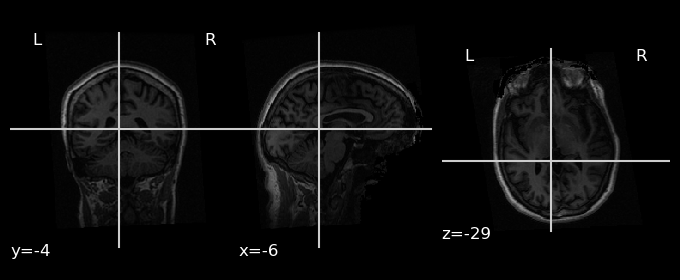

In [12]:
subject = "sub-01"
anat_img = f"{subjects_dir}{subject}/ses-test/anat/{subject}_ses-test_T1w.nii.gz"

plotting.plot_anat(anat_img)

Great! As you've seen, plotting with nilearn is straightforward. But we can also modify the view by passing some parameters to the Nilearn function, e.g., the desired display mode or cut-coordinates. As for every Nilearn function, a full description of possible parameters can be found in the [documentation](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_anat.html#nilearn.plotting.plot_anat) or directly in Colab by either using ```?``` or ```help()```.


In [13]:
?plotting.plot_anat

Signature:
plotting.plot_anat(
    anat_img=<MNI152Template>,
    cut_coords=None,
    output_file=None,
    display_mode='ortho',
    figure=None,
    axes=None,
    title=None,
    annotate=True,
    threshold=None,
    draw_cross=True,
    black_bg='auto',
    dim='auto',
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f0f300ad640>,
    colorbar=False,
    cbar_tick_format='%.2g',
    vmin=None,
    vmax=None,
    **kwargs,
)
Docstring:
Plot cuts of an anatomical image (by default 3 cuts:
Frontal, Axial, and Lateral)

Parameters
----------
anat_img : Niimg-like object, optional
    See :ref:`extracting_data`.
    The anatomical image to be used as a background. If None is
    given, nilearn tries to find a T1 template.
    Default=MNI152TEMPLATE.

cut_coords : None, a :obj:`tuple` of :obj:`float`, or :obj:`int`, optional
    The MNI coordinates of the point where the cut is performed.

        - If ``display_mode`` is 'ortho' or 'tiled', this should
          be a 3

In [14]:
help(plotting.plot_anat)

Help on function plot_anat in module nilearn.plotting.img_plotting:

plot_anat(anat_img=<MNI152Template>, cut_coords=None, output_file=None, display_mode='ortho', figure=None, axes=None, title=None, annotate=True, threshold=None, draw_cross=True, black_bg='auto', dim='auto', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f0f300ad640>, colorbar=False, cbar_tick_format='%.2g', vmin=None, vmax=None, **kwargs)
    Plot cuts of an anatomical image (by default 3 cuts:
    Frontal, Axial, and Lateral)
    
    Parameters
    ----------
    anat_img : Niimg-like object, optional
        See :ref:`extracting_data`.
        The anatomical image to be used as a background. If None is
        given, nilearn tries to find a T1 template.
        Default=MNI152TEMPLATE.
    
    cut_coords : None, a :obj:`tuple` of :obj:`float`, or :obj:`int`, optional
        The MNI coordinates of the point where the cut is performed.
    
            - If ``display_mode`` is 'ortho' or 'tiled', this 


Let's tell Nilearn to plot 6 slices of the subjects anatomical image in axial direction

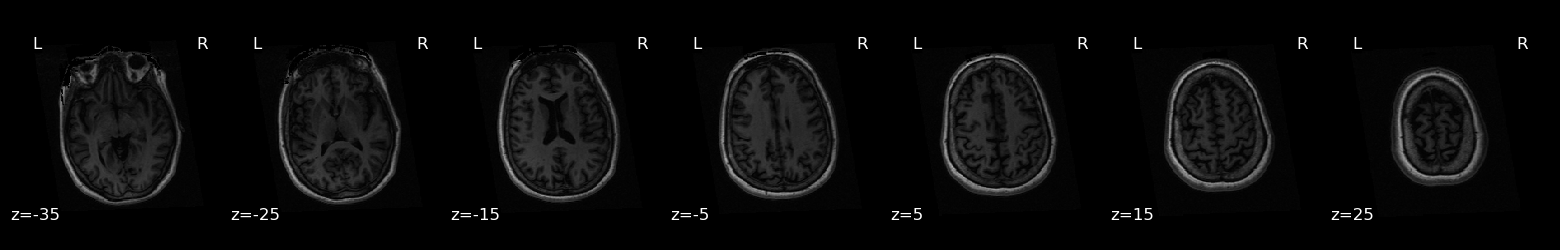

In [15]:
plotting.plot_anat(anat_img,
                   display_mode="z",
                   cut_coords=range(-35,35,10))

Thanks to the BIDS specification, we can easily loop over the images of multiple subjects and get a quick look at each subject's brain.

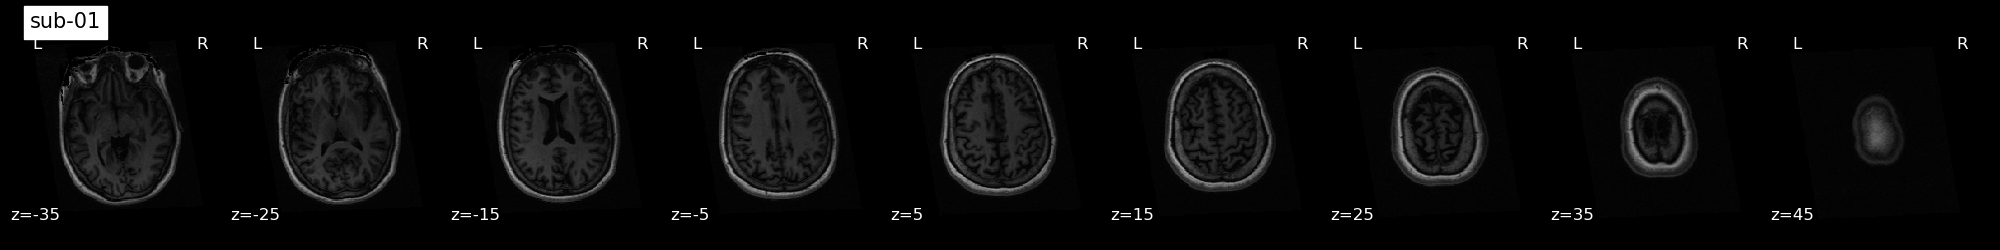

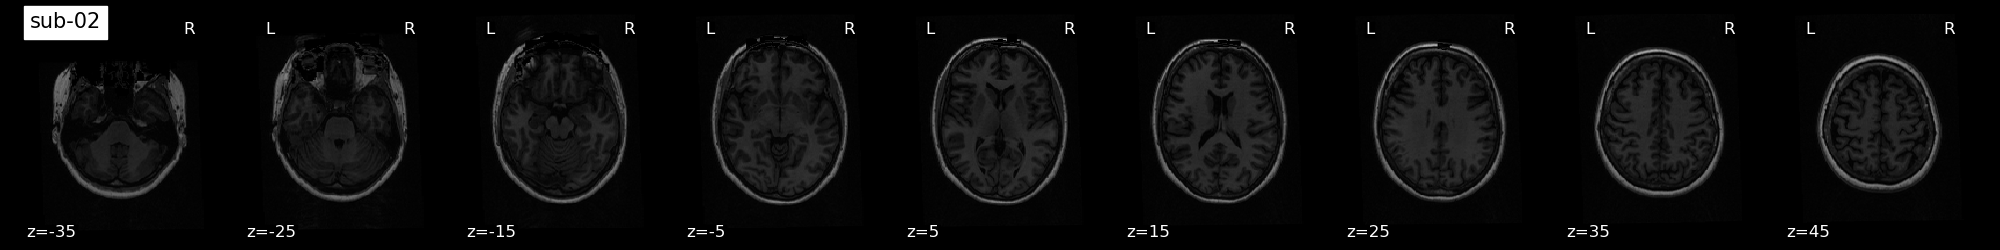

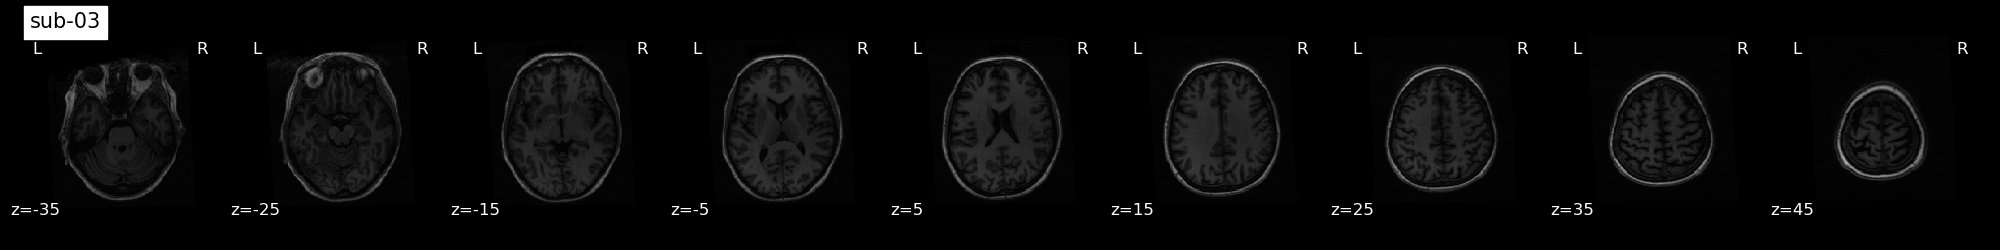

In [16]:
subject_list = ["sub-01", "sub-02", "sub-03"]

for subject in subject_list:
  
    anat_img = f"{subjects_dir}{subject}/ses-test/anat/{subject}_ses-test_T1w.nii.gz"
    plotting.plot_anat(
        anat_img,
        display_mode="z",
        cut_coords=range(-35,50,10),
        title=subject
    )

There you go! As one can clearly, the brains of the subjects differ quite a bit. Likewise, these raw images are also not yet in a standard space. That is one reason why we need to perform some preprocessing of the data before we can get started with the actual analysis. 

## Exercise

Try to plot the functional image stored in the ```func``` directory.

Tip: Use the Nilearn function ```mean_img``` with the path to the functional image as the only parameter to get the mean functional image. This is neccessary as a 3D image needs to be provided (more on that in the next session).

In [ ]:
from nilearn import image

## code here
func_img = image.mean_img(" ")

### Bonus exercise

Refactor the code you have written above to a function that takes a file path to a functional image, calculates its mean image and then plots the result. Once you have created the function, create a loop and run the function for every participant.



In [ ]:
def plot_mean_img():
    # code here
    pass

## Resources

[The Good Research Code Handbook](https://goodresearch.dev/index.html): Handbook focussing on good programming practice for research

[Nilearn Documentation](https://nilearn.github.io/stable/index.html): Offical Nilearn documentation. Hear you can find different examples and user guides as well as details to all Nilearn modules

[Neurostars](https://neurostars.org): Q/A forum for neuroscience research